In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [141]:
df = pd.read_csv("train.csv")
df.head()

y=np.log(df["SalePrice"])
df=df.drop("SalePrice", axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Datenvorbereitung/Datacleaning

## Spalten mit vielen Null-Werten eliminieren

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [143]:
# show features with more than 1000 missing values
threshold=500
nullCountSeries=df.isnull().sum()
cols_with_min_threshold_null_values=nullCountSeries[nullCountSeries>threshold].index
cols_with_min_threshold_null_values

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [144]:
# create a dataframe with cols_with_min_threshold_null_values and SalePrice
df2=df[cols_with_min_threshold_null_values]
df2=df2.notnull().astype('int')
df2['SalePrice']=y

<AxesSubplot: >

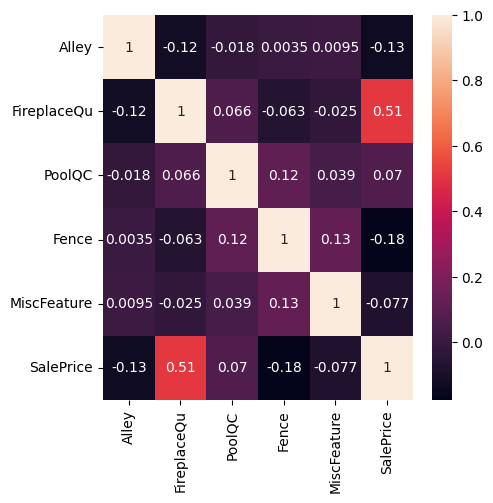

In [145]:
# plot a heatmap of df2 with sales price
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(),annot=True)

In [146]:
df= df.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1)

## Null-Werte auffüllen

In [147]:

num_cols=[]
cat_cols=[]

for col in df.columns:
    if df[col].dtype=="int64" or df[col].dtype=="float64":
        num_cols.append(col)
    else:
        cat_cols.append(col)

print("num_cols", num_cols)
print("cat_cols", cat_cols)
    

num_cols ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
cat_cols ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQu

In [148]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Fehlende numerical-Werte bei: LotFrontage 259, MasVnrArea 8, GarageYrBlt 81

alle mit mean füllen aber für LotFrontage neues Feature mit LotFrontage_is_null einführen, da evtl. wichtig

In [149]:
lot_frontage_is_null=df["LotFrontage"].isnull()
df["lot_frontage_is_null"]=lot_frontage_is_null

In [150]:
num_cols_tofill=["LotFrontage", "MasVnrArea", "GarageYrBlt"]
for col in num_cols_tofill:
    null_values=df[col].isnull()
    df[col][null_values]=df[col].mean()

/tmp/ipykernel_9715/1791996704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][null_values]=df[col].mean()


In [151]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [152]:
null_sum=df[cat_cols].isnull().sum()
null_sum[null_sum>0].index

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [153]:
cat_cols_to_fill_with_modus=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical']

In [154]:
for col in cat_cols_to_fill_with_modus:
    to_fill=df[col].isnull()
    df.loc[to_fill, col]=df[col].mode().iloc[0]

In [155]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [156]:
fireplace_is_null=df['FireplaceQu'].isnull()
df.loc[fireplace_is_null, 'FireplaceQu']='Null'

In [157]:
df['FireplaceQu'].isnull().sum()

0

## Cat-Werte zu Zahlen konvertieren

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for col in cat_cols:
    encoded = le.fit_transform(df[col])
    df[col]=encoded

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lot_frontage_is_null
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,False
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,False
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,False
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,False
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,False


# Feature Engineering
### Neue Infos aus den bestehenden Daten extrahieren und bereit stellen

# Split der Daten

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid=train_test_split(df, y, test_size=0.1, random_state=42, shuffle=True)

# Modellbildung

## Fehlerfunktion

In [164]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [171]:
knn=KNeighborsRegressor(n_neighbors=7)
knn=knn.fit(x_train, y_train)
preds=knn.predict(x_valid)
print("KNN", "rmse on training", root_mean_squared_error(y_train, knn.predict(x_train) ))
print("KNN", "rmse on valid", root_mean_squared_error(y_valid, knn.predict(x_valid) ))


KNN rmse on training 0.19607119905364565
KNN rmse on valid 0.22002885869240277


In [190]:
dt=DecisionTreeRegressor(min_samples_leaf=5, max_depth=7, random_state=42)
dt=dt.fit(x_train, y_train)
preds=dt.predict(x_valid)
print("DT", "rmse on training", root_mean_squared_error(y_train, dt.predict(x_train) ))
print("DT", "rmse on valid", root_mean_squared_error(y_valid, dt.predict(x_valid) ))

DT rmse on training 0.12142913814999806
DT rmse on valid 0.17617637166907305


### find best Hyperparameter for Decision Tree

In [180]:
pipeline_dt = make_pipeline(DecisionTreeRegressor(random_state=42))
print( pipeline_dt.get_params() )


{'memory': None, 'steps': [('decisiontreeregressor', DecisionTreeRegressor())], 'verbose': False, 'decisiontreeregressor': DecisionTreeRegressor(), 'decisiontreeregressor__ccp_alpha': 0.0, 'decisiontreeregressor__criterion': 'squared_error', 'decisiontreeregressor__max_depth': None, 'decisiontreeregressor__max_features': None, 'decisiontreeregressor__max_leaf_nodes': None, 'decisiontreeregressor__min_impurity_decrease': 0.0, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2, 'decisiontreeregressor__min_weight_fraction_leaf': 0.0, 'decisiontreeregressor__random_state': None, 'decisiontreeregressor__splitter': 'best'}


In [181]:
hyperparameters_dt = { 'decisiontreeregressor__max_depth' : [None, 3, 8, 20, 60],
                  'decisiontreeregressor__min_samples_split': [1, 2, 5, 10, 0.05],
                   'decisiontreeregressor__min_samples_leaf': [1, 2, 5, 0.02]}

dt_cv = GridSearchCV(pipeline_dt, hyperparameters_dt, cv=10)
 
# Fit and tune model
dt_cv.fit(x_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [None, 3, 8, 20,
                                                              60],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 5,
                                                                     0.02],
                         'decisiontreeregressor__min_samples_split': [1, 2, 5,
                                                                      10,
                                                                      0.05]})

In [182]:
print( dt_cv.best_params_ )


{'decisiontreeregressor__max_depth': 8, 'decisiontreeregressor__min_samples_leaf': 2, 'decisiontreeregressor__min_samples_split': 0.05}


In [183]:
print("DT", "rmse on training", root_mean_squared_error(y_train, dt_cv.predict(x_train) ))
print("DT", "rmse on valid", root_mean_squared_error(y_valid, dt_cv.predict(x_valid) ))

DT rmse on training 0.1564429578312607
DT rmse on valid 0.18444779624435692
